In [1]:
import cv2
import mediapipe as mp
import cv2
import numpy as np
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.1, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

In [3]:
hog = cv2.HOGDescriptor()

In [4]:
SIZE_IMG = (75, 50)

In [5]:
# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# 2. Tính toán các tham số truyền vào HOGDescriptor
# winSize: Kích thước của bức ảnh được crop để chia hết cho cell size.
winSize = (SIZE_IMG[0] // cell_size[1] * cell_size[1], SIZE_IMG[1] // cell_size[0] * cell_size[0])
# blockSize: Kích thước của 1 block
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
# blockStride: Số bước di chuyển của block khi thực hiện chuẩn hóa histogram bước 3
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

# 3. Compute HOG descriptor
hog = cv2.HOGDescriptor(_winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _cellSize=cell_size,
                        _nbins=nbins)

Kích thước bức ảnh crop theo winSize (pixel):  (72, 48)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)


In [6]:
SIZE_IMG = (25, 25)

In [7]:
def detectPose(image):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    # # Create a copy of the input image.
    white_image = np.zeros_like(image) 
    # # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Draw Pose landmarks on the output image.
    # mp_drawing.draw_landmarks(image=white_image, landmark_list=results.pose_landmarks,
    #                             connections=mp_pose.POSE_CONNECTIONS)
    
    xs = []
    ys = []
    # Kiểm tra xem có landmarks không
    if results.pose_landmarks:
        # Lặp qua các điểm landmarks và in tọa độ của chúng
        height, width, _ = image.shape
        for landmark in results.pose_landmarks.landmark:
            # x, y = int(landmark.x * width), int(landmark.y * height)
            # replace null equal 0
            xs.append(landmark.x)
            ys.append(landmark.y)
    
    # print(len(xs))
    # if len(xs) != 0:
    #     x_max, x_min = max(np.max(xs), 0), max(np.min(xs), 0)
    #     y_max, y_min = max(0, np.max(ys)), max(np.min(ys), 0)
    #     image = cv2.resize(white_image[y_min: y_max + 10, x_min:x_max + 10], SIZE_IMG)
    # else :
    #     image = cv2.resize(white_image, SIZE_IMG)

    # cv2.imwrite("image_test.png", image)
    # # Reshape hog feature
    # # hog_feats = hog.compute(image)
    
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = image/255.0

    return xs + ys

In [8]:
def drawDetectPose(image):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    # # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Draw Pose landmarks on the output image.
    mp_drawing.draw_landmarks(image=image, landmark_list=results.pose_landmarks,
                                connections=mp_pose.POSE_CONNECTIONS)
    
    # Save image
    # cv2.imwrite("frame1_2400.png", image)

    # show image
    plt.imshow(image)


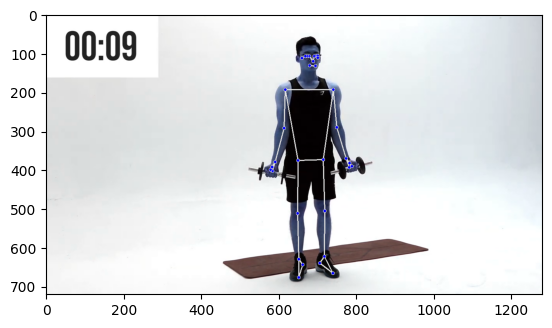

In [9]:
drawDetectPose(cv2.imread(r"D:\HocTap\HK2_Nam3\ML\Final-machine-learning\Label_data\STAND\frame1_2400.png"))

In [10]:
a = detectPose(cv2.imread(r"Label_data\LIE\fall001.jpg"))
b = detectPose(cv2.imread(r"Label_data\LIE\Screenshot 2023-12-19 125800.png"))
 
# create a DataFrame
df = pd.DataFrame([a, b])
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.349697,0.339983,0.339356,0.338889,0.339676,0.338909,0.338215,0.339065,0.339037,0.35532,...,0.558517,0.557992,0.555640,0.455448,0.567590,0.592514,0.582997,0.613375,0.534586,0.596352
1,0.349097,0.344431,0.345618,0.346826,0.342847,0.342918,0.342915,0.355319,0.349948,0.35860,...,0.749584,0.726949,0.688137,0.685364,0.617907,0.621437,0.591858,0.594611,0.668399,0.668285


In [11]:
img = cv2.imread(r"Label_data\LIE\fall001.jpg")
white_img = np.zeros_like(img)
imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = pose.process(imageRGB)
print(results.pose_landmarks)
if results.pose_landmarks:
    # Lặp qua các điểm landmarks và in tọa độ của chúng
    height, width, _ = img.shape
    xs = []
    ys = []
    for landmark in results.pose_landmarks.landmark:
        x, y = int(landmark.x * width), int(landmark.y * height)
        xs.append(landmark.x)
        ys.append(landmark.y)


landmark {
  x: 0.34969717264175415
  y: 0.5419737696647644
  z: -0.017158519476652145
  visibility: 0.9999961853027344
}
landmark {
  x: 0.3399832844734192
  y: 0.5448083281517029
  z: -0.002837433712556958
  visibility: 0.9999946355819702
}
landmark {
  x: 0.3393557667732239
  y: 0.5457379817962646
  z: -0.003044126322492957
  visibility: 0.9999943971633911
}
landmark {
  x: 0.33888858556747437
  y: 0.5465428829193115
  z: -0.002990557812154293
  visibility: 0.9999973773956299
}
landmark {
  x: 0.3396756649017334
  y: 0.5475500822067261
  z: -0.029329344630241394
  visibility: 0.9999949932098389
}
landmark {
  x: 0.3389087915420532
  y: 0.550218403339386
  z: -0.029520198702812195
  visibility: 0.9999934434890747
}
landmark {
  x: 0.3382149934768677
  y: 0.552606999874115
  z: -0.02955859713256359
  visibility: 0.9999909400939941
}
landmark {
  x: 0.3390651345252991
  y: 0.5579068064689636
  z: 0.0643407478928566
  visibility: 0.9999988079071045
}
landmark {
  x: 0.3390365540981293
 

In [9]:
data_lie = glob.glob("./Label_data/LIE/*")

In [10]:
features_lie = []
for path in data_lie:
    image = cv2.imread(path)
    # image.shape (183, 275, 3)
    image = cv2.resize(image, (275, 183))
    result = detectPose(image)
    # print(result.shape)
    features_lie.append(result)
    # break

In [11]:
data_STAND = glob.glob("./Label_data/STAND/*")
features_STAND = []
for path in data_STAND:

    image = cv2.imread(path)
    image = cv2.resize(image, (275, 183))

    result = detectPose(image)
 
    features_STAND.append(result)

In [12]:
data_SIT = glob.glob("./Label_data/SIT/*")

features_SIT = []
for path in data_SIT:
    image = cv2.imread(path)
    image = cv2.resize(image, (275, 183))

    result = detectPose(image)
 
    features_SIT.append(result)

In [14]:
sit= pd.DataFrame(features_SIT)
stand= pd.DataFrame(features_STAND)
lie = pd.DataFrame(features_lie)

In [30]:
# # Lưu dữ liệu
# sit.to_csv("sit.csv", index=False)
# stand.to_csv("stand.csv", index=False)
# lie.to_csv("lie.csv", index=False)

In [12]:
# # đọc dữ liệu
# sit = pd.read_csv("sit.csv")
# stand = pd.read_csv("stand.csv")
# lie = pd.read_csv("lie.csv")

In [32]:
stand

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.485436,0.491076,0.492672,0.495898,0.484701,0.480690,0.478701,0.504215,0.459930,0.489268,...,0.241237,0.233786,0.379103,0.349344,0.448858,0.410068,0.448141,0.406550,0.516652,0.473009
1,0.538939,0.541082,0.545321,0.548543,0.531356,0.526921,0.523388,0.547487,0.514275,0.544556,...,0.511923,0.514108,0.701264,0.701886,0.863484,0.874072,0.884246,0.893225,0.921288,0.937136
2,0.538487,0.540775,0.545152,0.548587,0.531299,0.527188,0.523476,0.547310,0.514200,0.543122,...,0.501320,0.503325,0.696693,0.699625,0.863796,0.872697,0.888294,0.895021,0.923210,0.938202
3,0.534376,0.536909,0.541130,0.544502,0.526705,0.522845,0.519051,0.545624,0.510163,0.539722,...,0.507434,0.506629,0.699450,0.697273,0.863291,0.869558,0.888832,0.893996,0.922597,0.932775
4,0.534185,0.536881,0.540584,0.544362,0.526786,0.523106,0.519260,0.544385,0.510132,0.538679,...,0.507436,0.507225,0.698847,0.701406,0.861969,0.870711,0.886882,0.894640,0.920795,0.934262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.601386,0.599138,0.594523,0.591196,0.609900,0.613605,0.619883,0.585218,0.629909,0.594849,...,0.455367,0.444362,0.647013,0.679698,0.835275,0.910994,0.878211,0.929477,0.877495,0.928804
1026,0.603582,0.608215,0.611376,0.614838,0.600846,0.598566,0.595752,0.622950,0.596521,0.611484,...,0.496380,0.491298,0.646302,0.634541,0.805225,0.786427,0.828163,0.812358,0.840161,0.815633
1027,0.570172,0.571512,0.573297,0.575214,0.568169,0.567701,0.567106,0.585243,0.574960,0.578529,...,0.383572,0.373445,0.584007,0.547758,0.724479,0.695663,0.745148,0.721174,0.768436,0.734995
1028,0.490573,0.493132,0.495253,0.497387,0.489989,0.489996,0.489953,0.511873,0.500842,0.500617,...,0.560284,0.552065,0.688601,0.664322,0.807368,0.814917,0.829953,0.845044,0.840853,0.836050


In [13]:
sit['label'] = [0 for i in range(len(sit))]
stand['label'] = [1 for i in range(len(stand))]
lie['label'] = [2 for i in range(len(lie))]

In [15]:
['SIT', 'STAND', 'LIE']

['SIT', 'STAND', 'LIE']

In [14]:
len(sit), len(stand), len(lie)

(1614, 1030, 790)

In [16]:
from sklearn.model_selection import train_test_split

In [124]:
rd = 20
train_lie, test_lie = train_test_split(lie, test_size=0.2, random_state=rd)
train_stand, test_stand = train_test_split(stand, test_size=0.2, random_state=rd)
train_sit, test_sit = train_test_split(sit, test_size=0.4, random_state=rd)

In [125]:
# train = pd.concat([sit, stand, lie]).reset_index().sample(frac=1)

train = pd.concat([train_lie, train_stand, train_sit]).reset_index().sample(frac=1)
test = pd.concat([test_lie, test_stand, test_sit]).reset_index().sample(frac=1)

# train = pd.concat([train_lie, train_stand]).reset_index().sample(frac=1)
# test = pd.concat([test_lie, test_stand]).reset_index().sample(frac=1)

In [126]:
train.label.value_counts()

label
0    968
1    824
2    632
Name: count, dtype: int64

In [127]:
test.label.value_counts()

label
0    646
1    206
2    158
Name: count, dtype: int64

In [128]:
train.drop(columns=['index'], inplace=True)
test.drop(columns=['index'], inplace=True)

In [129]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , f1_score

In [130]:
train.label.value_counts()

label
0    968
1    824
2    632
Name: count, dtype: int64

In [131]:
X_train, y_train = train.loc[:, train.columns != 'label'], train.label

In [132]:
X_test, y_test = test.loc[:, test.columns != 'label'], test.label

In [133]:
X_train = X_train.fillna(0.)

In [134]:
X_test = X_test.fillna(0.)

In [135]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
951,0.587813,0.583584,0.581475,0.579009,0.584796,0.583926,0.583184,0.565693,0.573137,0.581493,...,0.471039,0.472045,0.640441,0.658686,0.814191,0.832700,0.846633,0.866205,0.837290,0.854245
1159,0.572711,0.577464,0.580825,0.583975,0.570834,0.569038,0.566788,0.591518,0.568646,0.580671,...,0.445807,0.440084,0.594835,0.583558,0.734215,0.721509,0.755424,0.744418,0.781708,0.749143
499,0.328364,0.323539,0.324585,0.325681,0.322003,0.321896,0.321756,0.334395,0.330294,0.337757,...,0.719927,0.697558,0.718367,0.685112,0.658409,0.639418,0.635751,0.625360,0.695363,0.675597
1921,0.672940,0.668315,0.666582,0.664650,0.668785,0.667541,0.666264,0.651716,0.655857,0.667265,...,0.621595,0.631795,0.662324,0.649763,0.781202,0.801735,0.810307,0.833799,0.805228,0.824260
1566,0.617906,0.626445,0.632159,0.638045,0.617523,0.615800,0.614070,0.655294,0.621908,0.629123,...,0.683112,0.660099,0.600559,0.574158,0.791027,0.774635,0.852240,0.835758,0.747339,0.749624


In [147]:
# Tạo mô hình SVM với kernel phi tuyến tính
svm_model = SVC(kernel='poly')

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

f1_Score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1_Score:.2f}')

print("Classification report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.9643564356435643
F1 Score: 0.96
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       646
           1       0.90      0.97      0.93       206
           2       0.97      0.97      0.97       158

    accuracy                           0.96      1010
   macro avg       0.95      0.97      0.96      1010
weighted avg       0.97      0.96      0.96      1010



In [79]:
# Sử dụng KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
f1_Score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1_Score:.2f}')
# Hiển thị báo cáo phân loại
print('Classification Report:')
print(classification_report(y_test, y_pred))




Accuracy: 0.95
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       646
           1       0.84      0.98      0.90       206
           2       0.97      0.96      0.97       158

    accuracy                           0.95      1010
   macro avg       0.93      0.96      0.94      1010
weighted avg       0.95      0.95      0.95      1010



In [80]:
# Sử dụng mô hình Decision Tree
# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier()

# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
f1_Score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1_Score:.2f}')
# Hiển thị báo cáo phân loại
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       646
           1       0.94      0.99      0.96       206
           2       0.96      0.95      0.95       158

    accuracy                           0.97      1010
   macro avg       0.96      0.97      0.96      1010
weighted avg       0.97      0.97      0.97      1010



In [31]:
from sklearn.linear_model import LogisticRegression

# Tạo mô hình Logistic Regression
lr_model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


# Lưu mô hình SVM đã huấn luyện

In [62]:
import pickle

pickle_file = "svm_model_sit_stand_lie.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(svm_model, file)


In [147]:
n_features = X_train.shape[1]
d = svm_model.degree
gamma = 1 / (n_features * np.array(X_train).var())
r = svm_model.coef0
bias = svm_model.intercept_
# Lấy các vector hỗ trợ từ mô hình SVM
support_vectors = svm_model.support_vectors_

# Lấy các hệ số Lagrange tương ứng với các vector hỗ trợ
dual_coef = svm_model.dual_coef_

In [148]:
weight = {
    "gamma": gamma, 
    "r": r, 
    "bias": bias[0], 
    'd': d, 
    "support_vectors": support_vectors.tolist(), 
    "dual_coef": dual_coef.tolist()
}

In [149]:
import json
# Lưu dictionary vào một file JSON 
with open('svm_weights_sit_lie_stand.json', 'w') as json_file:
    json.dump(weight, json_file)

In [157]:
np.array(weight['support_vectors']).shape

(255, 66)

### TESTING

In [126]:
# Tải lại mô hình SVM đã lưu
pickle_file = "svm_model_sit_stand_lie.pkl"
with open(pickle_file, 'rb') as file:
    loaded_svm_model = pickle.load(file)

In [83]:
# with open('svm_weights_lie_stand.json', 'r') as json_file:
#     weight = json.load(json_file)

In [98]:
# with open('svm_weights_sit_lie_stand.json', 'r') as json_file:
#     weight = json.load(json_file)

In [99]:
# np.array(weight['support_vectors']).shape

(255, 66)

In [101]:
# np.array(weight['dual_coef']).shape

(2, 255)

In [102]:
# np.array(weight['gamma'])

array(0.44691205)

In [127]:
# def kernel(x, x_hat):
#     return (weight['gamma'] * np.dot(x, x_hat) + weight['r']) ** weight['d']

# def predict(X):
#     s = 0
#     for dual, sv in zip(weight['dual_coef'][0], weight['support_vectors']):
#         s += dual * kernel(sv, X)
#     # Thêm độ dời (bias)
#     s += weight['bias']
#     return int(s > 0)


In [158]:
X_test = np.array(X_test)

In [159]:
# y_pred = [predict(x) for x in X_test]

In [160]:
y_pred = loaded_svm_model.predict(X_test)

In [163]:
pd.DataFrame(y_pred, columns=['label']).label.value_counts()

label
0    313
1    114
2     78
Name: count, dtype: int64

In [164]:
pd.DataFrame(y_test, columns=['label']).label.value_counts()

label
0    323
1    103
2     79
Name: count, dtype: int64

In [165]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Hiển thị báo cáo phân loại
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       323
           1       0.89      0.98      0.93       103
           2       0.97      0.96      0.97        79

    accuracy                           0.96       505
   macro avg       0.95      0.97      0.96       505
weighted avg       0.96      0.96      0.96       505

